In [1]:
pwd

'/home/maxkennebrew/projects/sports_etl_project/notebooks'

In [2]:
import sqlite3
import pandas as pd

# Connect to the database
conn = sqlite3.connect("../data/teamstats.db")

# See what tables exist
tables = pd.read_sql("SELECT name FROM sqlite_master WHERE type='table';", conn)
print(tables)

                                name
0                   team_stats_clean
1             team_stats_10_yr_clean
2                         game_stats
3  wnba_teamstats_clean_2013_present


In [3]:
pd.set_option("display.max_columns", None)

In [4]:
df = pd.read_sql("SELECT * FROM wnba_teamstats_clean_2013_present ;", conn)
df.tail()

,Season,Team,G#,Date,Home,Opp,W/L,Tm_Pts,Opp_Pts,Tm_FG,Tm_FGA,Tm_FG%,Tm_3P,Tm_3PA,Tm_3P%,Tm_FT,Tm_FTA,Tm_FT%,Tm_ORB,Tm_TRB,Tm_AST,Tm_STL,Tm_BLK,Tm_TOV,Tm_PF,Opp_FG,Opp_FGA,Opp_FG%,Opp_3P,Opp_3PA,Opp_3P%,Opp_FT,Opp_FTA,Opp_FT%,Opp_ORB,Opp_TRB,Opp_AST,Opp_STL,Opp_BLK,Opp_TOV,Opp_PF,win_margin,Tm_poss,Opp_poss,Tm_off_rating,Tm_def_rating,Tm_tov_rate,Opp_tov_rate
4151,2025,GSV,12,2025-06-19,1,IND,W,88,77,30,70,0.429,9,31,0.290,19,27,0.704,8,32,18,10,5,7,18,29,66,0.439,8,29,0.276,11,12,0.917,5,35,20,3,3,16,22,11,80.88,82.28,108.803165,93.582888,0.086548,1.0
4152,2025,GSV,13,2025-06-22,1,CON,W,87,63,28,78,0.359,9,31,0.290,22,29,0.759,19,51,18,9,3,9,16,20,66,0.303,7,24,0.292,16,21,0.762,10,35,14,4,10,13,23,24,80.76,78.24,107.726597,80.521472,0.111441,1.0
4153,2025,GSV,14,2025-06-25,1,NYL,L,78,81,28,72,0.389,12,35,0.343,10,12,0.833,10,38,20,5,3,10,14,26,72,0.361,12,36,0.333,17,19,0.895,13,37,18,5,5,8,16,-3,77.28,75.36,100.931677,107.484076,0.129400,1.0
4154,2025,GSV,15,2025-06-27,1,CHI,W,83,78,26,69,0.377,11,30,0.367,20,29,0.690,10,42,16,4,2,9,19,26,70,0.371,13,33,0.394,13,19,0.684,8,40,15,7,4,11,22,5,80.76,81.36,102.773650,95.870206,0.111441,1.0
4155,2025,GSV,16,2025-06-29,1,SEA,W,84,57,31,64,0.484,8,27,0.296,14,18,0.778,6,41,20,5,4,16,10,20,74,0.270,6,28,0.214,11,14,0.786,13,38,13,8,4,11,17,27,81.92,78.16,102.539062,72.927329,0.195312,1.0


In [5]:
from sports_etl.etl.scrape_wnba_stats import scrape_games_for_team
from sports_etl.etl.transform import transform_team_stats_my_dataset
import pandas as pd

# List of 2025 team abbreviations (adjust if needed)
wnba_teams_2025 = ['ATL', 'CHI', 'CON', 'DAL', 'IND', 'LAS', 'MIN',
                   'NYL', 'PHO', 'SEA', 'WAS', 'LVA', 'GSV']

# Step 1: Scrape latest 2025 game logs
df_2025_list = []

for team in wnba_teams_2025:
    try:
        team_df = scrape_games_for_team(team, season=2025)
        df_2025_list.append(team_df)
    except Exception as e:
        print(f"Error scraping {team}: {e}")

df_2025_latest = pd.concat(df_2025_list, ignore_index=True)
df_2025_latest_clean = transform_team_stats_my_dataset(df_2025_latest)

# Step 2: Concatenate with your cleaned archive
# (Assuming df_clean already exists in memory)
df_latest = pd.concat([df, df_2025_latest_clean], ignore_index=True)

# Optional: Deduplicate in case of overlap
df_latest.drop_duplicates(subset=["Season", "Team", "Date", "Opp"], keep="last", inplace=True)

Scraping URL: https://www.basketball-reference.com/wnba/teams/ATL/2025/gamelog
Scraping URL: https://www.basketball-reference.com/wnba/teams/CHI/2025/gamelog
Scraping URL: https://www.basketball-reference.com/wnba/teams/CON/2025/gamelog
Scraping URL: https://www.basketball-reference.com/wnba/teams/DAL/2025/gamelog
Scraping URL: https://www.basketball-reference.com/wnba/teams/IND/2025/gamelog
Scraping URL: https://www.basketball-reference.com/wnba/teams/LAS/2025/gamelog
Scraping URL: https://www.basketball-reference.com/wnba/teams/MIN/2025/gamelog
Scraping URL: https://www.basketball-reference.com/wnba/teams/NYL/2025/gamelog
Scraping URL: https://www.basketball-reference.com/wnba/teams/PHO/2025/gamelog
Scraping URL: https://www.basketball-reference.com/wnba/teams/SEA/2025/gamelog
Scraping URL: https://www.basketball-reference.com/wnba/teams/WAS/2025/gamelog
Scraping URL: https://www.basketball-reference.com/wnba/teams/LVA/2025/gamelog
Scraping URL: https://www.basketball-reference.com/w

[INFO] Transformed team stats — final shape after deduplication: (226, 48)
[INFO] Transformed team stats with new features.


In [6]:
df_latest.to_sql("wnba_teamstats_clean_2013_present", conn, if_exists="replace", index=False)
conn.close()

In [7]:
# Connect to the database
conn = sqlite3.connect("../data/teamstats.db")

df_today = pd.read_sql("SELECT * FROM wnba_teamstats_clean_2013_present ;", conn)
df_today.tail()

,Season,Team,G#,Date,Home,Opp,W/L,Tm_Pts,Opp_Pts,Tm_FG,Tm_FGA,Tm_FG%,Tm_3P,Tm_3PA,Tm_3P%,Tm_FT,Tm_FTA,Tm_FT%,Tm_ORB,Tm_TRB,Tm_AST,Tm_STL,Tm_BLK,Tm_TOV,Tm_PF,Opp_FG,Opp_FGA,Opp_FG%,Opp_3P,Opp_3PA,Opp_3P%,Opp_FT,Opp_FTA,Opp_FT%,Opp_ORB,Opp_TRB,Opp_AST,Opp_STL,Opp_BLK,Opp_TOV,Opp_PF,win_margin,Tm_poss,Opp_poss,Tm_off_rating,Tm_def_rating,Tm_tov_rate,Opp_tov_rate
4161,2025,GSV,12,2025-06-19,1,IND,W,88,77,30,70,0.429,9,31,0.290,19,27,0.704,8,32,18,10,5,7,18,29,66,0.439,8,29,0.276,11,12,0.917,5,35,20,3,3,16,22,11,80.88,82.28,108.803165,93.582888,0.086548,1.0
4162,2025,GSV,13,2025-06-22,1,CON,W,87,63,28,78,0.359,9,31,0.290,22,29,0.759,19,51,18,9,3,9,16,20,66,0.303,7,24,0.292,16,21,0.762,10,35,14,4,10,13,23,24,80.76,78.24,107.726597,80.521472,0.111441,1.0
4163,2025,GSV,14,2025-06-25,1,NYL,L,78,81,28,72,0.389,12,35,0.343,10,12,0.833,10,38,20,5,3,10,14,26,72,0.361,12,36,0.333,17,19,0.895,13,37,18,5,5,8,16,-3,77.28,75.36,100.931677,107.484076,0.129400,1.0
4164,2025,GSV,15,2025-06-27,1,CHI,W,83,78,26,69,0.377,11,30,0.367,20,29,0.690,10,42,16,4,2,9,19,26,70,0.371,13,33,0.394,13,19,0.684,8,40,15,7,4,11,22,5,80.76,81.36,102.773650,95.870206,0.111441,1.0
4165,2025,GSV,16,2025-06-29,1,SEA,W,84,57,31,64,0.484,8,27,0.296,14,18,0.778,6,41,20,5,4,16,10,20,74,0.270,6,28,0.214,11,14,0.786,13,38,13,8,4,11,17,27,81.92,78.16,102.539062,72.927329,0.195312,1.0


# Unique Lineups

In [8]:
df_2025 = df_today[df_today["Season"] == 2025].copy()

In [9]:
print(df_2025.shape)
print(df_2025["Season"].unique())

(226, 48)
[2025]


In [10]:
%run ../scripts/update_game_ids.py

Scraping: https://site.api.espn.com/apis/site/v2/sports/basketball/wnba/scoreboard?dates=20250704
Scraping: https://site.api.espn.com/apis/site/v2/sports/basketball/wnba/scoreboard?dates=20250705
Scraping: https://site.api.espn.com/apis/site/v2/sports/basketball/wnba/scoreboard?dates=20250706
Scraping: https://site.api.espn.com/apis/site/v2/sports/basketball/wnba/scoreboard?dates=20250707
Scraping: https://site.api.espn.com/apis/site/v2/sports/basketball/wnba/scoreboard?dates=20250708
Scraping: https://site.api.espn.com/apis/site/v2/sports/basketball/wnba/scoreboard?dates=20250709
Scraping: https://site.api.espn.com/apis/site/v2/sports/basketball/wnba/scoreboard?dates=20250710
Scraping: https://site.api.espn.com/apis/site/v2/sports/basketball/wnba/scoreboard?dates=20250711
✅ Added 17 new IDs → Total: 17


In [14]:
from sports_etl.api.espn_utils import get_starters_from_boxscore_api_fixed

In [17]:
pwd

'/home/maxkennebrew/projects/sports_etl_project/notebooks'

In [18]:
from time import sleep

# Load the game IDs we just saved
with open("../data/wnba_2025_game_ids.json", "r") as f:
    game_ids = json.load(f)

all_starters = []

for game_id in game_ids:
    data = get_starters_from_boxscore_api_fixed(game_id)
    if data and data["teams"]:
        all_starters.append(data)
    sleep(0.2)  # Respectful delay

# Save all starter data
with open("../data/wnba_2025_starters.json", "w") as f:
    json.dump(all_starters, f, indent=2)

print(f"✅ Saved starters for {len(all_starters)} games.")

✅ Saved starters for 114 games.


In [19]:
import json
from collections import defaultdict, Counter

# Load your full starter data
with open("../data/wnba_2025_starters.json", "r") as f:
    all_games = json.load(f)

# Build a dictionary of team → lineup frequency
team_lineups = defaultdict(Counter)

for game in all_games:
    for team in game["teams"]:
        team_name = team["team"]
        starters = team["starters"]

        if len(starters) != 5:
            continue  # skip incomplete games

        # Normalize names (lowercase, ignore order)
        names = frozenset(player["name"].strip().lower() for player in starters)
        team_lineups[team_name][names] += 1

# Calculate consistency
consistency = []

for team, lineup_counter in team_lineups.items():
    total_games = sum(lineup_counter.values())
    most_common = lineup_counter.most_common(1)[0][1] if lineup_counter else 0
    unique_lineups = len(lineup_counter)
    score = round(most_common / total_games, 3) if total_games else 0

    consistency.append({
        "team": team,
        "total_games": total_games,
        "most_common_lineup_games": most_common,
        "unique_lineups": unique_lineups,
        "consistency_score": score
    })

# Sort by highest consistency
consistency_sorted = sorted(consistency, key=lambda x: (-x["consistency_score"], -x["most_common_lineup_games"]))

# Print summary
print(f"\n🏀 Starter Consistency Rankings (2025, May–June)\n")
for i, team in enumerate(consistency_sorted, 1):
    print(f"{i}. {team['team']}: {team['consistency_score']*100:.1f}% "
          f"(Most used lineup: {team['most_common_lineup_games']} of {team['total_games']} games, "
          f"{team['unique_lineups']} unique lineups)")

# Optionally save to file
with open("../data/wnba_2025_starter_consistency.json", "w") as f:
    json.dump(consistency_sorted, f, indent=2)


🏀 Starter Consistency Rankings (2025, May–June)

1. Las Vegas Aces: 82.4% (Most used lineup: 14 of 17 games, 3 unique lineups)
2. Minnesota Lynx: 61.1% (Most used lineup: 11 of 18 games, 5 unique lineups)
3. Seattle Storm: 61.1% (Most used lineup: 11 of 18 games, 2 unique lineups)
4. Atlanta Dream: 55.6% (Most used lineup: 10 of 18 games, 5 unique lineups)
5. Washington Mystics: 55.6% (Most used lineup: 10 of 18 games, 5 unique lineups)
6. Chicago Sky: 43.8% (Most used lineup: 7 of 16 games, 5 unique lineups)
7. New York Liberty: 41.2% (Most used lineup: 7 of 17 games, 8 unique lineups)
8. Phoenix Mercury: 38.9% (Most used lineup: 7 of 18 games, 3 unique lineups)
9. Indiana Fever: 33.3% (Most used lineup: 6 of 18 games, 4 unique lineups)
10. Dallas Wings: 31.6% (Most used lineup: 6 of 19 games, 8 unique lineups)
11. Los Angeles Sparks: 27.8% (Most used lineup: 5 of 18 games, 7 unique lineups)
12. Golden State Valkyries: 25.0% (Most used lineup: 4 of 16 games, 8 unique lineups)
13. Con

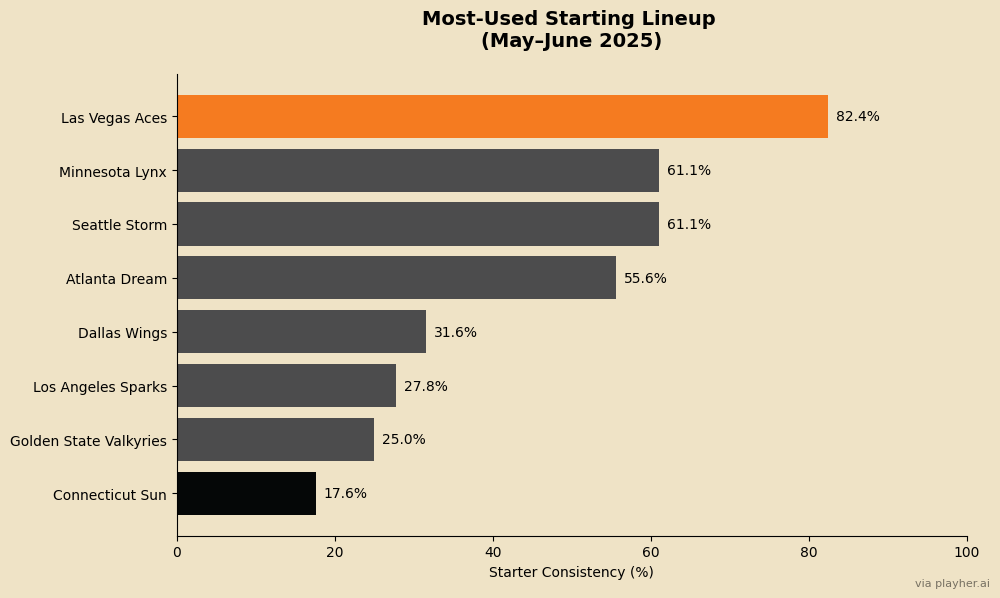

In [22]:
import matplotlib.pyplot as plt
from sports_etl.viz.styling import (
    apply_playher_watermark,
    get_wnba_brand_colors
)

# Sorted from highest to lowest
teams = [
    "Las Vegas Aces", "Minnesota Lynx", "Seattle Storm", "Atlanta Dream",
    "Dallas Wings", "Los Angeles Sparks", "Golden State Valkyries", "Connecticut Sun"
]
consistency = [82.4, 61.1, 61.1, 55.6, 31.6, 27.8, 25.0, 17.6]

# Get brand palette
brand = get_wnba_brand_colors()

# Color highlight: Aces = orange, Sun = black, rest = gray
colors = []
for team in teams:
    if team == "Las Vegas Aces":
        colors.append(brand["primary"])
    elif team == "Connecticut Sun":
        colors.append(brand["secondary"])
    else:
        colors.append(brand["gray"])

# Plot
fig, ax = plt.subplots(figsize=(10, 6))
fig.patch.set_facecolor(brand["neutral"])
ax.set_facecolor(brand["neutral"])

bars = ax.barh(teams, consistency, color=colors)
ax.set_xlim(0, 100)
ax.set_xlabel("Starter Consistency (%)")
ax.set_title(
    "Most-Used Starting Lineup \n(May–June 2025)",
    fontsize=14,          # adjust smaller
    fontweight="bold",    # make it bold
    pad=20                # push it up slightly
)

# Add value labels
for bar in bars:
    width = bar.get_width()
    ax.text(width + 1, bar.get_y() + bar.get_height()/2, f"{width:.1f}%", va='center', fontsize=10)

# Invert Y for descending view (Aces on top, Sun on bottom)
ax.invert_yaxis()

# Remove spines for cleaner look
ax.spines[['top', 'right']].set_visible(False)

# Add watermark
apply_playher_watermark(fig, position="bottom-right")

plt.tight_layout()
plt.show()


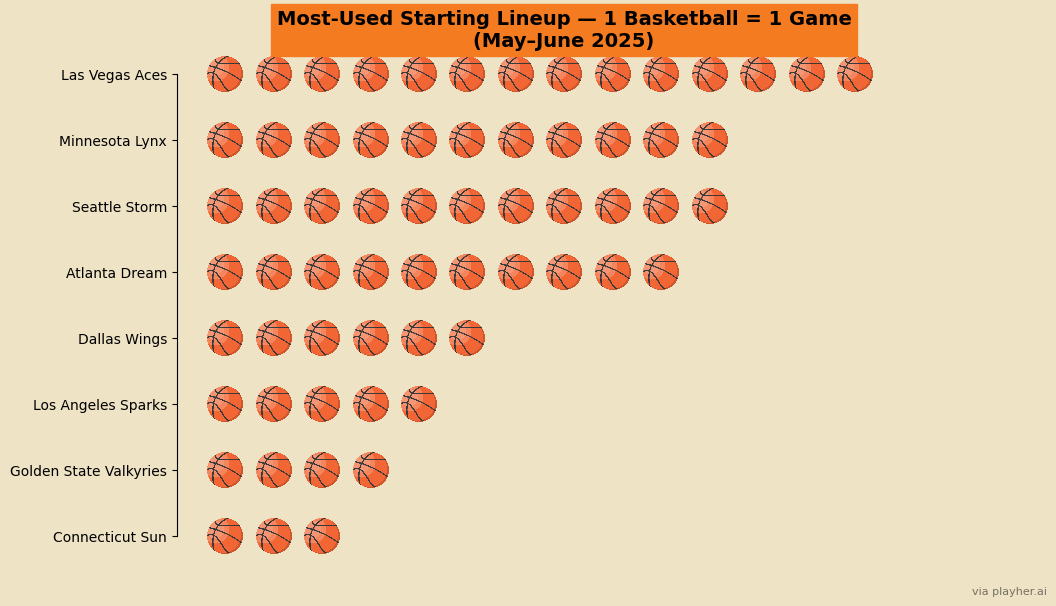

In [23]:
import matplotlib.pyplot as plt
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
import matplotlib.image as mpimg
from sports_etl.viz.styling import apply_playher_watermark, get_wnba_brand_colors

# Sorted from highest to lowest
teams = [
    "Las Vegas Aces", "Minnesota Lynx", "Seattle Storm", "Atlanta Dream",
    "Dallas Wings", "Los Angeles Sparks", "Golden State Valkyries", "Connecticut Sun"
]
most_common_lineup_counts = [14, 11, 11, 10, 6, 5, 4, 3]  # same order

# Get brand color for background and watermark
brand = get_wnba_brand_colors()
fig, ax = plt.subplots(figsize=(10, 6))
fig.patch.set_facecolor(brand["neutral"])
ax.set_facecolor(brand["neutral"])
word_bubble=brand["primary"]

# Load basketball icon
icon_path = "..//icons/basketball.png"
ball_img = mpimg.imread(icon_path)
imagebox = OffsetImage(ball_img, zoom=0.05)

# Plot icons
y_range = range(len(teams))
for i, (team, count) in enumerate(zip(teams, most_common_lineup_counts)):
    for j in range(count):
        ab = AnnotationBbox(
            imagebox,
            (j, i),  # (x=ball count, y=team position)
            frameon=False
        )
        ax.add_artist(ab)

# Label teams
ax.set_yticks(y_range)
ax.set_yticklabels(teams)
ax.set_xticks([])
ax.set_xlim(-1, max(most_common_lineup_counts) + 1)
ax.set_title(
    "Most-Used Starting Lineup — 1 Basketball = 1 Game\n(May–June 2025)",
    fontsize=14,          # adjust smaller
    fontweight="bold",    # make it bold
    backgroundcolor = word_bubble,
    pad=20                # push it up slightly
)

# Clean up
ax.invert_yaxis()
ax.spines[['top', 'right', 'bottom']].set_visible(False)
apply_playher_watermark(fig, position="bottom-right")
#plt.tight_layout()
plt.show()